In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_epochs = 100
batch_size = 100
learning_rate = 1e-3

In [3]:
train_dataset = dsets.MNIST(root='data/', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)
test_dataset = dsets.MNIST(root='data/', 
                           train=False, 
                           transform=transforms.ToTensor())

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [5]:
def add_noise(img):
    noise = torch.randn(img.size()) * 0.2
    noisy_img = img + noise
    return noisy_img

In [6]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), nn.Linear(64, 12), nn.ReLU(True), nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), nn.Linear(128, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [7]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

In [8]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        images = images.view(-1, 28*28)
        images = add_noise(images)# add noise
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        
        if((i+1) % 100 == 0):
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

C:\Users\mohit_tare\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


Epoch [1/100], Step [100/600], Loss: 0.1021
Epoch [1/100], Step [200/600], Loss: 0.0980
Epoch [1/100], Step [300/600], Loss: 0.0907
Epoch [1/100], Step [400/600], Loss: 0.0846
Epoch [1/100], Step [500/600], Loss: 0.0872
Epoch [1/100], Step [600/600], Loss: 0.0874
Epoch [2/100], Step [100/600], Loss: 0.0887
Epoch [2/100], Step [200/600], Loss: 0.0824
Epoch [2/100], Step [300/600], Loss: 0.0832
Epoch [2/100], Step [400/600], Loss: 0.0794
Epoch [2/100], Step [500/600], Loss: 0.0840
Epoch [2/100], Step [600/600], Loss: 0.0818
Epoch [3/100], Step [100/600], Loss: 0.0809
Epoch [3/100], Step [200/600], Loss: 0.0847
Epoch [3/100], Step [300/600], Loss: 0.0842
Epoch [3/100], Step [400/600], Loss: 0.0811
Epoch [3/100], Step [500/600], Loss: 0.0818
Epoch [3/100], Step [600/600], Loss: 0.0795
Epoch [4/100], Step [100/600], Loss: 0.0811
Epoch [4/100], Step [200/600], Loss: 0.0815
Epoch [4/100], Step [300/600], Loss: 0.0783
Epoch [4/100], Step [400/600], Loss: 0.0825
Epoch [4/100], Step [500/600], L

Epoch [31/100], Step [400/600], Loss: 0.0768
Epoch [31/100], Step [500/600], Loss: 0.0740
Epoch [31/100], Step [600/600], Loss: 0.0721
Epoch [32/100], Step [100/600], Loss: 0.0753
Epoch [32/100], Step [200/600], Loss: 0.0735
Epoch [32/100], Step [300/600], Loss: 0.0753
Epoch [32/100], Step [400/600], Loss: 0.0756
Epoch [32/100], Step [500/600], Loss: 0.0748
Epoch [32/100], Step [600/600], Loss: 0.0739
Epoch [33/100], Step [100/600], Loss: 0.0739
Epoch [33/100], Step [200/600], Loss: 0.0736
Epoch [33/100], Step [300/600], Loss: 0.0752
Epoch [33/100], Step [400/600], Loss: 0.0756
Epoch [33/100], Step [500/600], Loss: 0.0748
Epoch [33/100], Step [600/600], Loss: 0.0736
Epoch [34/100], Step [100/600], Loss: 0.0726
Epoch [34/100], Step [200/600], Loss: 0.0725
Epoch [34/100], Step [300/600], Loss: 0.0745
Epoch [34/100], Step [400/600], Loss: 0.0764
Epoch [34/100], Step [500/600], Loss: 0.0739
Epoch [34/100], Step [600/600], Loss: 0.0745
Epoch [35/100], Step [100/600], Loss: 0.0730
Epoch [35/

Epoch [61/100], Step [600/600], Loss: 0.0748
Epoch [62/100], Step [100/600], Loss: 0.0720
Epoch [62/100], Step [200/600], Loss: 0.0766
Epoch [62/100], Step [300/600], Loss: 0.0713
Epoch [62/100], Step [400/600], Loss: 0.0697
Epoch [62/100], Step [500/600], Loss: 0.0733
Epoch [62/100], Step [600/600], Loss: 0.0730
Epoch [63/100], Step [100/600], Loss: 0.0729
Epoch [63/100], Step [200/600], Loss: 0.0751
Epoch [63/100], Step [300/600], Loss: 0.0710
Epoch [63/100], Step [400/600], Loss: 0.0733
Epoch [63/100], Step [500/600], Loss: 0.0752
Epoch [63/100], Step [600/600], Loss: 0.0749
Epoch [64/100], Step [100/600], Loss: 0.0702
Epoch [64/100], Step [200/600], Loss: 0.0698
Epoch [64/100], Step [300/600], Loss: 0.0715
Epoch [64/100], Step [400/600], Loss: 0.0754
Epoch [64/100], Step [500/600], Loss: 0.0744
Epoch [64/100], Step [600/600], Loss: 0.0730
Epoch [65/100], Step [100/600], Loss: 0.0718
Epoch [65/100], Step [200/600], Loss: 0.0719
Epoch [65/100], Step [300/600], Loss: 0.0718
Epoch [65/

Epoch [92/100], Step [200/600], Loss: 0.0743
Epoch [92/100], Step [300/600], Loss: 0.0718
Epoch [92/100], Step [400/600], Loss: 0.0742
Epoch [92/100], Step [500/600], Loss: 0.0737
Epoch [92/100], Step [600/600], Loss: 0.0717
Epoch [93/100], Step [100/600], Loss: 0.0717
Epoch [93/100], Step [200/600], Loss: 0.0723
Epoch [93/100], Step [300/600], Loss: 0.0720
Epoch [93/100], Step [400/600], Loss: 0.0728
Epoch [93/100], Step [500/600], Loss: 0.0727
Epoch [93/100], Step [600/600], Loss: 0.0748
Epoch [94/100], Step [100/600], Loss: 0.0683
Epoch [94/100], Step [200/600], Loss: 0.0713
Epoch [94/100], Step [300/600], Loss: 0.0723
Epoch [94/100], Step [400/600], Loss: 0.0699
Epoch [94/100], Step [500/600], Loss: 0.0734
Epoch [94/100], Step [600/600], Loss: 0.0739
Epoch [95/100], Step [100/600], Loss: 0.0719
Epoch [95/100], Step [200/600], Loss: 0.0750
Epoch [95/100], Step [300/600], Loss: 0.0741
Epoch [95/100], Step [400/600], Loss: 0.0722
Epoch [95/100], Step [500/600], Loss: 0.0708
Epoch [95/

In [9]:
test_images,_ = next(iter(test_loader))

In [10]:
test_images = add_noise(test_images.view(-1,28*28))

In [11]:
test_output = model(test_images)

In [12]:
test_output = test_output.view(100,28,28)

In [13]:
def validate_op(n_images,orig_images,decoded_images,image_width):
    fig, axes = plt.subplots(nrows=2, ncols=n_images, 
                         sharex=True, sharey=True, figsize=(20, 2.5))
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    plt.grid(False)
    plt.ylabel("Decoded (Bottom)   |   Original(Top)")
    orig_images = orig_images[:n_images]
    decoded_images = decoded_images[:n_images]
    
    
    for i in range(n_images):
        for ax, img in zip(axes, [orig_images, decoded_images]):
            ax[i].imshow(img[i].detach().reshape((image_width, image_width)),cmap = 'gray')

C:\Users\mohit_tare\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


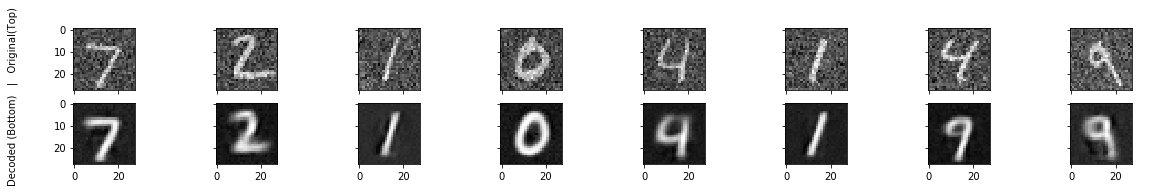

In [14]:
validate_op(8,test_images,test_output,28)